# Project - Bayesian Phylogenetics - Analysis Part

## Saccomani Alessio, Mengoni Leon 

### Information Theory And Inference  2023-2024

In this project we tackle the basis of the bayesian phylogenetic . In particular we will see an example of nucleotide substituion and how to construct and infer the tree.  **The construction and data formation has been already done in another python script, here we deal with the use of the software RevBayes and the analysis of the inference results obtained.**




**Phylogenetics** is the study of evolutionary relationships among biological entities – often species, individuals, or genes. These relationships are usually depicted in a **phylogenetic tree**, a diagram that represents the evolutionary history and common ancestry of the entities being studied. The branching pattern of the tree indicates how different entities are related, with each branch point, or node, representing a common ancestor. At the heart of phylogenetics lies the concept of nucleotide substitution. **Nucleotide substitution** refers to the process by which one nucleotide (A, T, C, or G) in a DNA sequence is replaced by another over time. These substitutions occur due to various evolutionary forces such as mutations, natural selection, genetic drift, and recombination. Understanding these substitutions is crucial for constructing accurate phylogenetic trees because they provide the raw data from which evolutionary relationships can be inferred. To accurately infer evolutionary relationships, scientists use models of nucleotide substitution. These models describe the rates at which one nucleotide is expected to be replaced by another over evolutionary time. Several models exist, ranging from simple to complex (Jukes-Cantor Model, Kimura Two-Parameter Model, General Time Reversible (GTR) Model).
We will use **Jukes Cantor** model that assumes that all nucleotide substitutions occur at the same rate.

Bayesian phylogenetics is an approach that applies Bayesian statistics to infer the most probable phylogenetic tree given the observed data and prior information. Bayesian inference provides a powerful framework for phylogenetic analysis because it allows the incorporation of prior knowledge and the computation of posterior probabilities for different phylogenetic trees. This method involves:

- Prior Distribution: Represents the initial beliefs about the parameters before considering the data.
- Likelihood: The probability of the observed data given a set of parameters.
- Posterior Distribution: Updated beliefs about the parameters after considering the data, obtained using Bayes' theorem.

Bayesian methods use Markov Chain Monte Carlo (MCMC) algorithms to sample from the posterior distribution, generating a set of trees and parameters that are consistent with the observed data and the prior information. The process of Bayesian phylogenetic analysis typically involves several key steps:

- Model Selection: Choosing the appropriate model of nucleotide substitution.
- Data Preparation: Aligning sequences and preparing the data matrix.
- Prior Specification: Defining the prior distributions for the parameters.
- MCMC Simulation: Running the MCMC algorithm to sample from the posterior distribution.
- Convergence Diagnosis: Checking that the MCMC simulation has adequately explored the parameter space.
- Tree Summarization: Summarizing the sampled trees into a consensus tree, which represents the most probable phylogenetic relationships.


In [59]:
from Bio import Phylo
from Bio.Phylo import BaseTree
from Bio.Phylo.Newick import Tree
import numpy as np
import matplotlib.pyplot as plt


### WRITING ON A FILE THE SIMULATION CARRIED ON PYTHON

In [ ]:
# Example usage
seq_len = 10
alpha = 1
n_taxa = 10

# Generate a random tree and write sequences to a NEXUS file
tree = Phylogenetic_Tree.generate_random_tree(seq_len, alpha, n_taxa=n_taxa)
tree.write_nexus_file('random_sequences.nex')
print(tree)


tree.draw(figsize=(12, 10))

tree.calculate_likelihood()
print(tree.likelihood)

# Print only the sequences
print("Sequences:")
for taxon, sequence in tree.get_sequences().items():
    print(f"{taxon}: {sequence}")




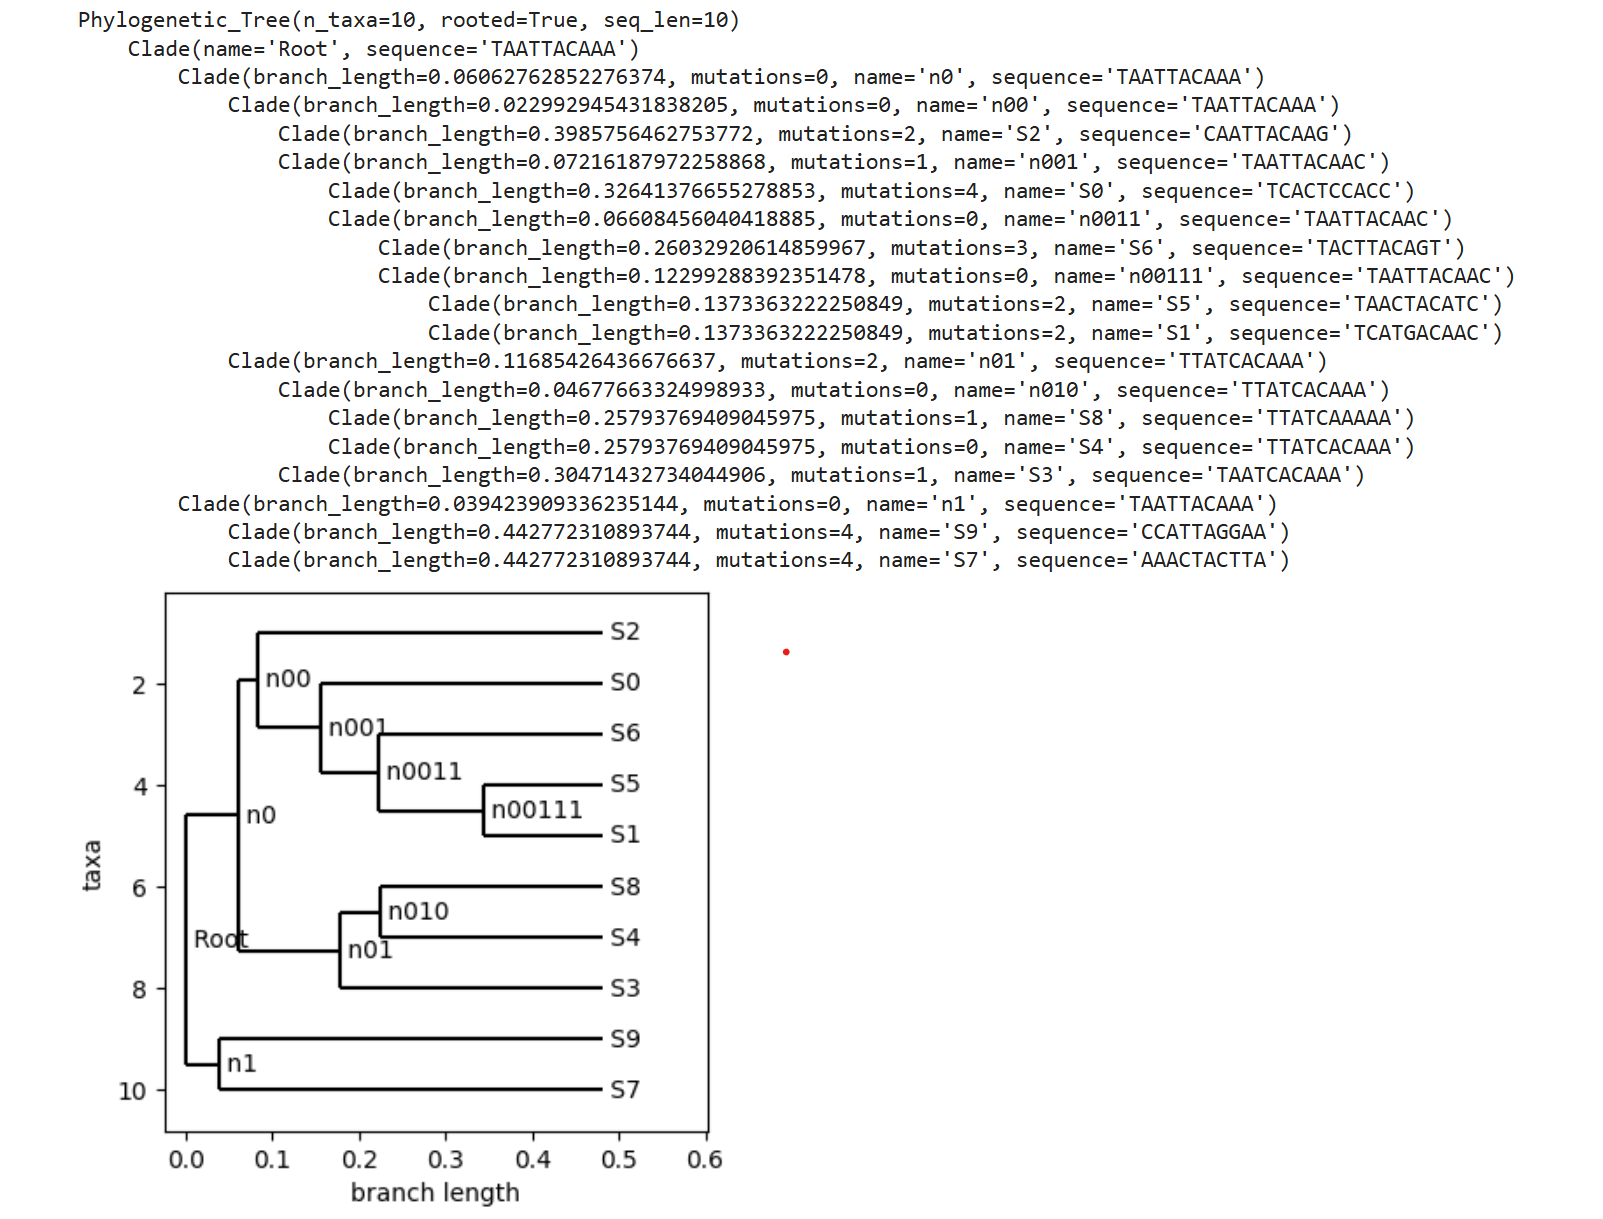

# Inference With RevBayes

RevBayes is a software platform designed for Bayesian statistical inference, specifically tailored for evolutionary biology and phylogenetics. It offers a flexible and extensible framework for modeling and analyzing evolutionary processes, allowing researchers to construct complex probabilistic models of sequence evolution, species diversification, and trait evolution. RevBayes uses a domain-specific language, Rev, which enables users to specify and customize their models easily. Through Markov Chain Monte Carlo (MCMC) algorithms, RevBayes performs efficient sampling from the posterior distribution of phylogenetic trees and model parameters, providing credible intervals and posterior probabilities for robust evolutionary inference. It is particularly useful for integrating various data types and accommodating complex evolutionary scenarios.

**This is the example of a script in RevBayes**

## Now we see step by step how the inference is done

**readDiscreteCharacterData("random_sequences.nex")**: Loads the sequence data from a Nexus file named "random_sequences.nex".

**print(data)**: Prints a summary of the loaded data.

**data.ntaxa()**: Retrieves the number of taxa (species or operational taxonomic units) in the dataset.


**2 * num_taxa - 3:** Calculates the number of branches in an unrooted binary tree with num_taxa tips.

**data.taxa():** Extracts the list of taxa.

**data.nchar():** Retrieves the number of sites (positions) in the sequence alignment.

**VectorMoves():** Initializes an empty vector to store the moves used in the MCMC algorithm.

**VectorMonitors():** Initializes an empty vector to store the monitors that will track the progress of the MCMC.

**fnJC(4):** Defines the Jukes-Cantor substitution model for 4 nucleotide states (A, C, G, T).

**clade([ "Species_7"]):** Defines "Species_7" as the outgroup.

**dnUniformTopology(taxa, outgroup=out_group):** Specifies a prior on the tree topology where the tree is uniformly sampled, with "Species_7" set as the outgroup.

**mvNNI(topology, weight=num_taxa / 1.0):** Adds a nearest-neighbor interchange move to the MCMC moves, with a weight proportional to the number of taxa.



The **NNI (Nearest Neighbour Interchange)** is an algorithm that consists in picking a single internal edge of a tree, and first contract it so that the four edges leading off its endpoints now arise from a single vertex. The resulting tree is not
binary, but we can resolve it into a binary tree by pulling a pair of the edges
joining this vertex away from the others, and inserting an edge between the two
pairs.


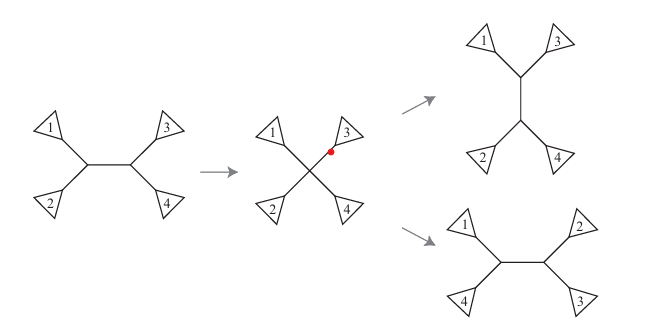



**mvSPR(topology, weight=num_taxa / 10.0):** Adds a subtree pruning and regrafting move to the MCMC moves, with a lower weight.

The **SPR (Subtree Prune and Regraft)** consists in first picking some edge of the tree, and then detaching it from the
 tree at only one end. The detached edge will still have some taxa joined to it
 through its other end, forming a subtree that has been pruned from the original
 tree. We then pick some edge of the other remnant of the tree, and reattach the
 subtree to it.


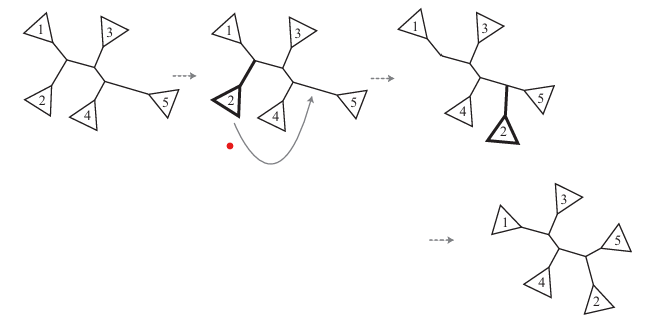



**dnGamma(2, 12):** Assumes branch lengths follow a gamma distribution with shape parameter 2 and rate parameter 12.

**mvScale(br_lens[i]):** Adds a scaling move for branch length i.

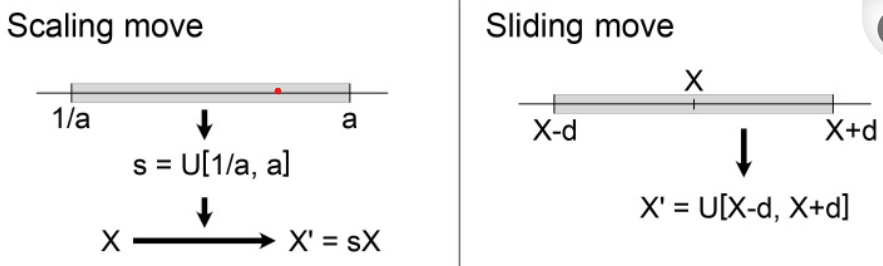

**mvLevyJump(br_lens[i], delta=0.2, weight=1.0):** Adds a Lévy jump move for branch length i with a jump size of 0.2 and weight 1.0.

**sum(br_lens):** Sums the lengths of all branches to get the total tree length TL.

**treeAssembly(topology, br_lens):** Combines the tree topology and branch lengths into a full phylogenetic tree psi.

**dnPhyloCTMC(tree=psi, Q=Q, type="DNA"):** Defines the phylogenetic likelihood using a continuous-time Markov chain (CTMC) model with the Jukes-Cantor substitution matrix Q and sequence type "DNA".

**seq.clamp(data):** Clamps the observed sequence data to the model, fixing the data to be the observed sequences.

**model(Q):** Defines the overall model object, incorporating all the previous definitions and relationships.

**mnModel(filename="output4/primates_cytb_JC4.log", printgen=1):** Creates a monitor to log the state of the model to a file every generation.

**mcmc(mymodel, monitors, moves):** Sets up the MCMC algorithm with the defined model, monitors, and moves.

**mymcmc.run(generations=200000, checkpointInterval=1, checkpointFile="mnt/d/infth/output4"):** Runs the MCMC for 200,000 generations, saving checkpoints every generation to the specified file.


# READ FILES DONE WITH REVBAYES WITH NNI ALGORITHM AND ANALYSIS

We load the file created with RevBayes and we analyze this with NNI algorithm:

The file **primates_cytb_JC.log** represent data like the number of iterations, priors, likelihood and the values of the branch lengths for each iteration so to compute the posterior.

The file **primates_cytb_JC.trees** represents all the trees sampled in the markov chain, when changed the topology. 

In [127]:
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import HTML
import random

def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

def read_log_file(filename):
   
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract the headers
    headers = lines[0].strip().split()
    num_columns = len(headers)
    
    # Initialize a dictionary to hold column data
    data = {header: [] for header in headers}
    
    # Parse the data, ignoring the header line
    for line in lines[1:]:
        values = line.strip().split()
        for i in range(num_columns):
            data[headers[i]].append(float(values[i]))

    # Convert lists to numpy arrays
    for header in headers:
        data[header] = np.array(data[header])

    return data

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
    


def load_data(data):

    iterations = data['Iteration']
    posterior = data['Posterior']
    likelihood = data['Likelihood']
    prior = data['Prior']
    br_lens_1 = data['br_lens[1]']
    br_lens_2 = data['br_lens[2]']
    br_lens_3 = data['br_lens[3]']
    br_lens_4 = data['br_lens[4]']
    br_lens_5 = data['br_lens[5]']
    br_lens_6 = data['br_lens[6]']
    br_lens_7 = data['br_lens[7]']
    br_lens_8 = data['br_lens[8]']
    br_lens_9 = data['br_lens[9]']
    br_lens_10 = data['br_lens[10]']
    br_lens_11 = data['br_lens[11]']
    br_lens_12 = data['br_lens[12]']
    br_lens_13 = data['br_lens[13]']
    br_lens_14 = data['br_lens[14]']
    br_lens_15 = data['br_lens[15]']
    br_lens_16 = data['br_lens[16]']
    br_lens_17 = data['br_lens[17]']
    TL = data['TL']


def gaus_fit(TL):
    counts, bin_edges, _ = plt.hist(TL, bins=30, edgecolor='black', density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    initial_guess = [1, np.mean(TL), np.std(TL)]
    params, covariance = curve_fit(gaussian, bin_centers, counts, p0=initial_guess)
    
    amp_fit, mean_fit, sigma_fit = params
    
    x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
    y_fit = gaussian(x_fit, amp_fit, mean_fit, sigma_fit)
    
    plt.plot(x_fit, y_fit, color='red', label='Gaussian fit')
    plt.title("Posterior Distribution of T")
    plt.xlabel("T (in million years)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    print(f"Fitted amplitude: {amp_fit}")
    print(f"Fitted mean: {mean_fit}")
    print(f"Fitted sigma: {sigma_fit}")



def read_and_visualize_trees(file_path, x,y):
    # Read the trees from the file
    trees = list(Phylo.parse(file_path, "newick"))
    print(f"Total number of trees in the file: {len(trees)}")
    for i in range(x,y):
        tree = trees[i]
        print(f"\nTree {i+1}:")
        Phylo.draw(tree)
        print(tree)


def create_final_plot(l):
    
    l.append(np.mean(data['br_lens[1]']))
    l.append(np.mean(data['br_lens[2]']))
    l.append(np.mean(data['br_lens[3]']))
    l.append(np.mean(data['br_lens[4]']))
    l.append(np.mean(data['br_lens[5]']))
    l.append(np.mean(data['br_lens[6]']))
    l.append(np.mean(data['br_lens[7]']))
    l.append(np.mean(data['br_lens[8]']))
    l.append(np.mean(data['br_lens[9]']))
    l.append(np.mean(data['br_lens[10]']))
    l.append(np.mean(data['br_lens[11]']))
    l.append(np.mean(data['br_lens[12]']))
    l.append(np.mean(data['br_lens[13]']))
    l.append(np.mean(data['br_lens[14]']))
    l.append(np.mean(data['br_lens[15]']))
    l.append(np.mean(data['br_lens[16]']))
    l.append(np.mean(data['br_lens[17]']))
    return l


In [128]:
filename = 'primates_cytb_JC.log'
data = read_log_file(filename)
load_data(data)

We want to see the posterior we sampled from. We will look at the posterior of the total length T, and of some branch lengths.

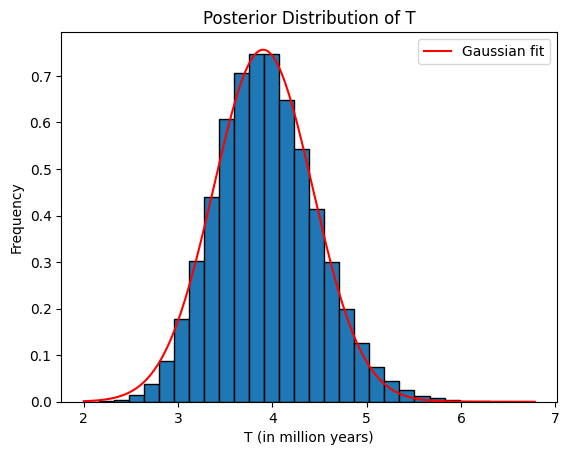

Fitted amplitude: 0.75624852845745
Fitted mean: 3.901769453402362
Fitted sigma: 0.5259809497509541


In [129]:
gaus_fit(TL)

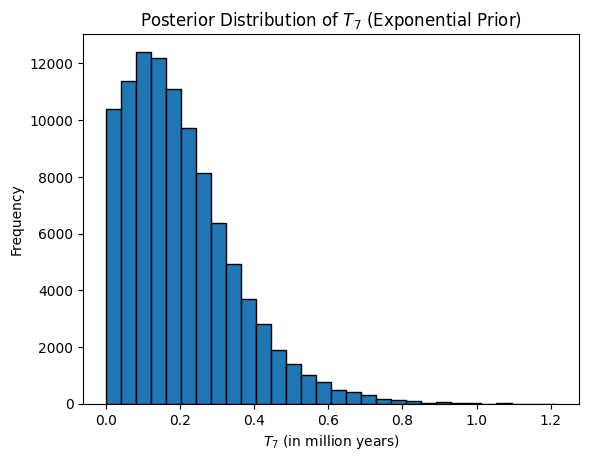

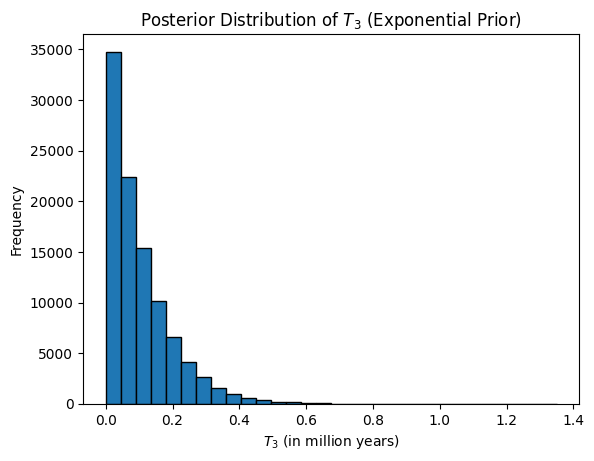

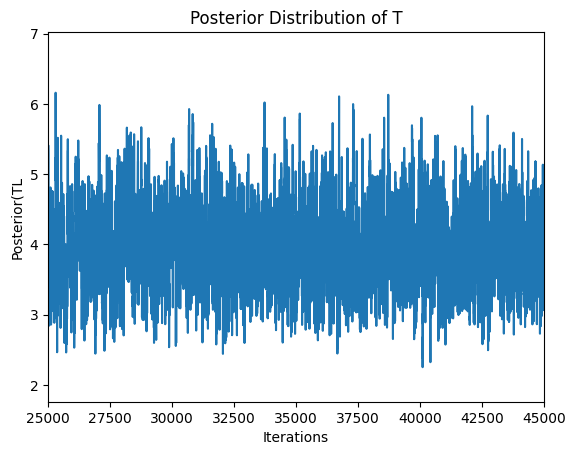

In [130]:
plt.hist(br_lens_7[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_7$ (Exponential Prior)")
plt.xlabel(r"$T_7$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.hist(br_lens_3[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_3$ (Exponential Prior)")
plt.xlabel(r"$T_3$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.plot(iterations, TL)
plt.xlim(25000, 45000)
plt.title("Posterior Distribution of T")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()


Now we look at the length of the branches both in the maximum posterior case and the mean posterior

Total number of trees in the file: 100001

Tree 72492:


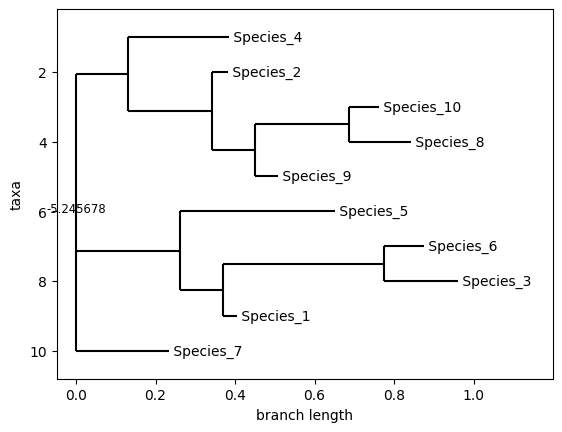

Tree(rooted=False, weight=1.0)
    Clade(comment='&index=18', confidence=-5.245678)
        Clade(branch_length=0.131562, comment='&index=17')
            Clade(branch_length=0.252774, comment='&index=4', name='Species_4')
            Clade(branch_length=0.211315, comment='&index=14')
                Clade(branch_length=0.038823, comment='&index=3', name='Species_2')
                Clade(branch_length=0.106373, comment='&index=15')
                    Clade(branch_length=0.236406, comment='&index=11')
                        Clade(branch_length=0.076161, comment='&index=9', name='Species_10')
                        Clade(branch_length=0.156759, comment='&index=7', name='Species_8')
                    Clade(branch_length=0.059061, comment='&index=10', name='Species_9')
        Clade(branch_length=0.260966, comment='&index=12')
            Clade(branch_length=0.389826, comment='&index=8', name='Species_5')
            Clade(branch_length=0.10968, comment='&index=16')
                C

In [131]:
ind = np.argmax(posterior)
trees_file_path = "primates_cytb_JC.trees"
read_and_visualize_trees(trees_file_path, ind,ind+1)

In [132]:
l1 = []
l1 = create_final_plot(l1)

# READ FILE WITH SPR ALGORITHM AND ANALYSIS

In [133]:
filename = 'primates_cytb_JC1.log'
data = read_log_file(filename)
load_data(data)

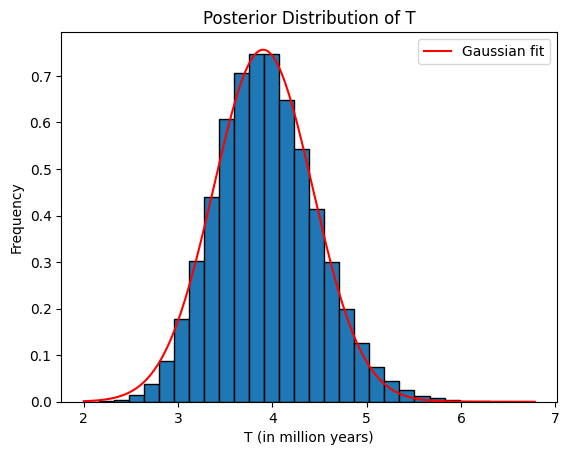

Fitted amplitude: 0.75624852845745
Fitted mean: 3.901769453402362
Fitted sigma: 0.5259809497509541


In [134]:
gaus_fit(TL)

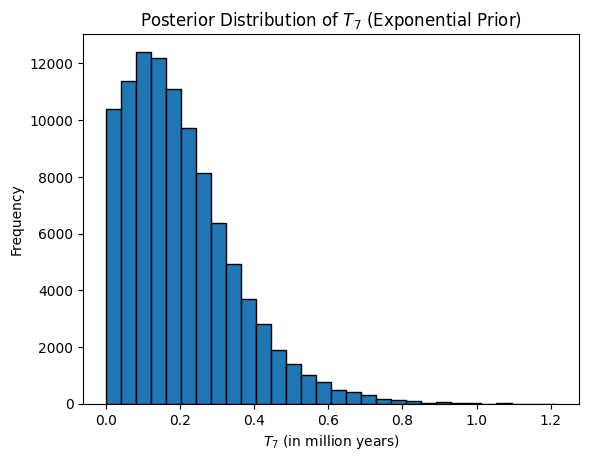

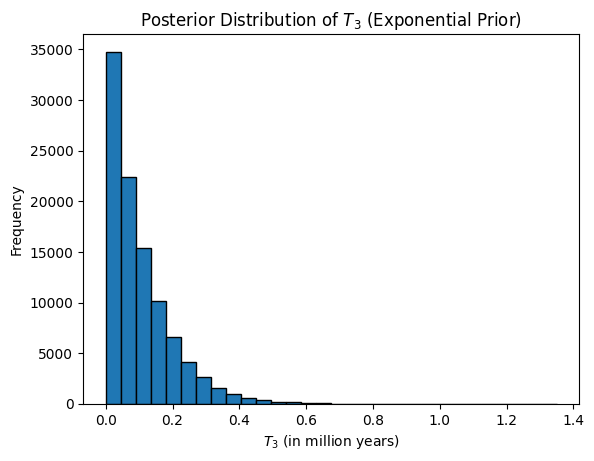

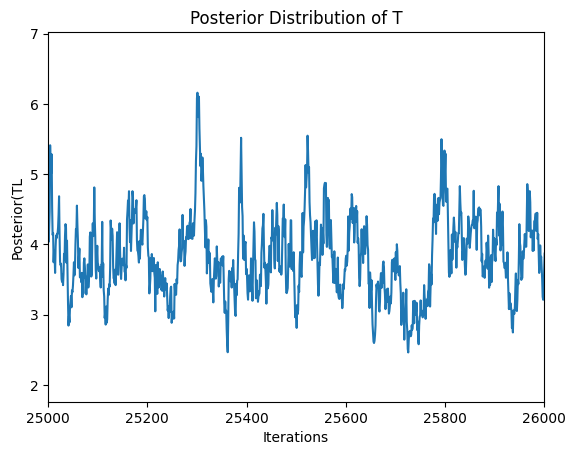

In [135]:
plt.hist(br_lens_7[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_7$ (Exponential Prior)")
plt.xlabel(r"$T_7$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.hist(br_lens_3[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_3$ (Exponential Prior)")
plt.xlabel(r"$T_3$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.plot(iterations, TL)
plt.xlim(25000, 26000)
plt.title("Posterior Distribution of T")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()


Total number of trees in the file: 100001

Tree 72492:


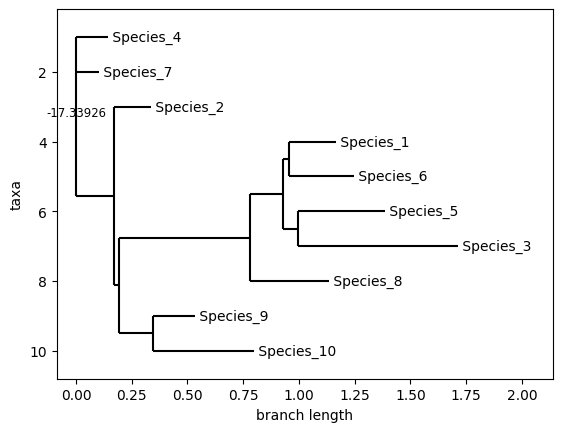

Tree(rooted=False, weight=1.0)
    Clade(comment='&index=18', confidence=-17.33926)
        Clade(branch_length=0.144544, comment='&index=4', name='Species_4')
        Clade(branch_length=0.102351, comment='&index=1', name='Species_7')
        Clade(branch_length=0.170225, comment='&index=13')
            Clade(branch_length=0.164807, comment='&index=3', name='Species_2')
            Clade(branch_length=0.022583, comment='&index=11')
                Clade(branch_length=0.588233, comment='&index=14')
                    Clade(branch_length=0.145611, comment='&index=15')
                        Clade(branch_length=0.028811, comment='&index=16')
                            Clade(branch_length=0.211256, comment='&index=5', name='Species_1')
                            Clade(branch_length=0.292861, comment='&index=6', name='Species_6')
                        Clade(branch_length=0.06714, comment='&index=12')
                            Clade(branch_length=0.391353, comment='&index=8', name=

In [136]:
ind = np.argmax(posterior)
trees_file_path = "primates_cytb_JC1.trees"
read_and_visualize_trees(trees_file_path, ind,ind+1)

In [137]:
l2 = []
l2 = create_final_plot(l2)

# ANALYSIS WITH BOTH NNI AND SPR



### With a "wrong" prior: an exponential with a=0.5

In [138]:
filename = 'primates_cytb_JC2.log'
data = read_log_file(filename)
load_data(data)

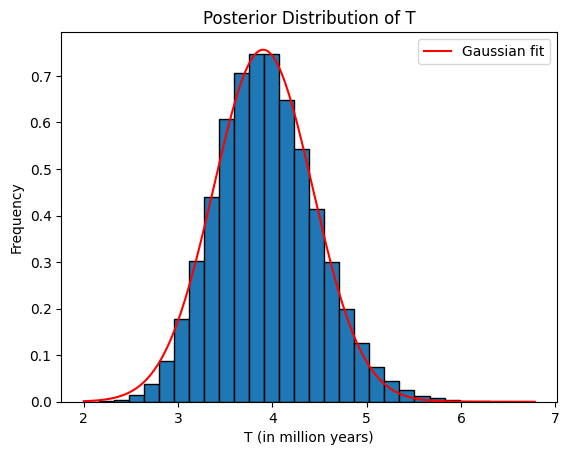

Fitted amplitude: 0.75624852845745
Fitted mean: 3.901769453402362
Fitted sigma: 0.5259809497509541


In [139]:
gaus_fit(TL)

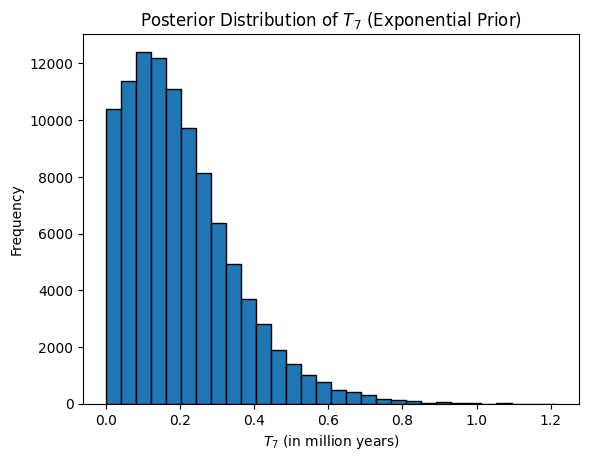

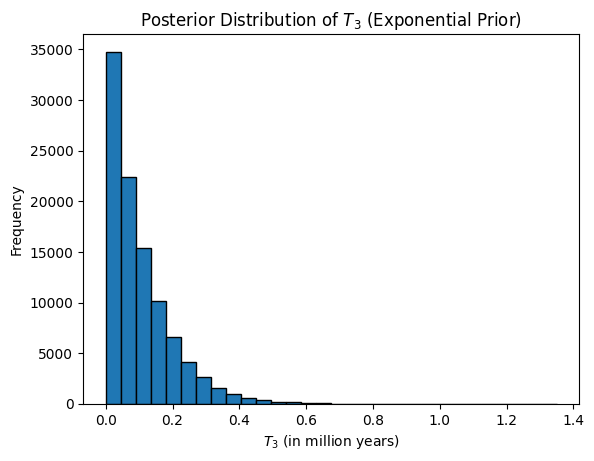

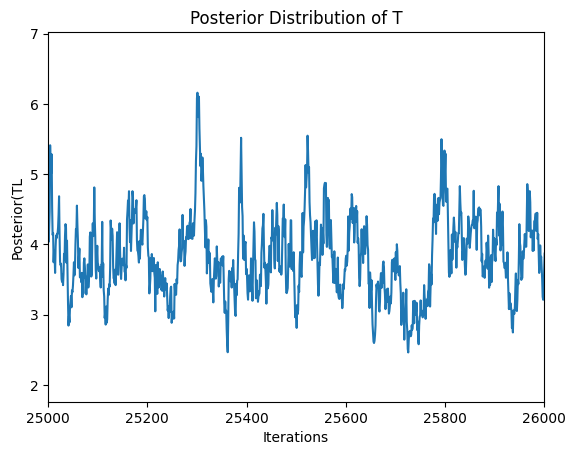

In [140]:
plt.hist(br_lens_7[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_7$ (Exponential Prior)")
plt.xlabel(r"$T_7$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.hist(br_lens_3[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_3$ (Exponential Prior)")
plt.xlabel(r"$T_3$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.plot(iterations, TL)
plt.xlim(25000, 26000)
plt.title("Posterior Distribution of T")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()


Total number of trees in the file: 100001

Tree 72492:


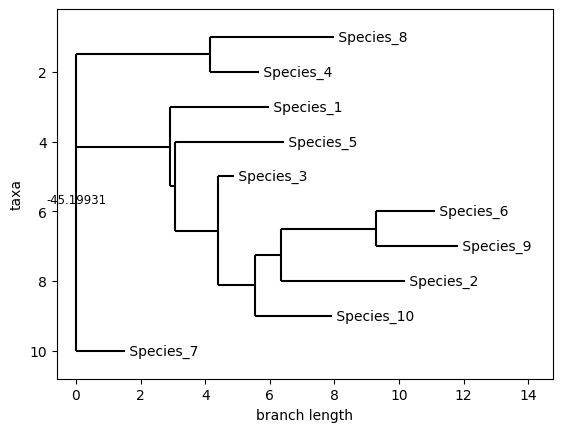

Tree(rooted=False, weight=1.0)
    Clade(comment='&index=18', confidence=-45.19931)
        Clade(branch_length=4.163289, comment='&index=12')
            Clade(branch_length=3.832609, comment='&index=7', name='Species_8')
            Clade(branch_length=1.517584, comment='&index=4', name='Species_4')
        Clade(branch_length=2.909669, comment='&index=15')
            Clade(branch_length=3.072134, comment='&index=5', name='Species_1')
            Clade(branch_length=0.161296, comment='&index=11')
                Clade(branch_length=3.379684, comment='&index=8', name='Species_5')
                Clade(branch_length=1.339854, comment='&index=14')
                    Clade(branch_length=0.474302, comment='&index=2', name='Species_3')
                    Clade(branch_length=1.144822, comment='&index=16')
                        Clade(branch_length=0.788188, comment='&index=17')
                            Clade(branch_length=2.959091, comment='&index=13')
                               

In [141]:
ind = np.argmax(posterior)
trees_file_path = "primates_cytb_JC2.trees"
read_and_visualize_trees(trees_file_path, ind,ind+1)

In [142]:
l3 = []
l3 = create_final_plot(l3)

## With a "correct" prior on the branch length: a Gamma(2.5, 10)

In [143]:
filename = 'primates_cytb_JC3.log'
data = read_log_file(filename)
load_data(data)

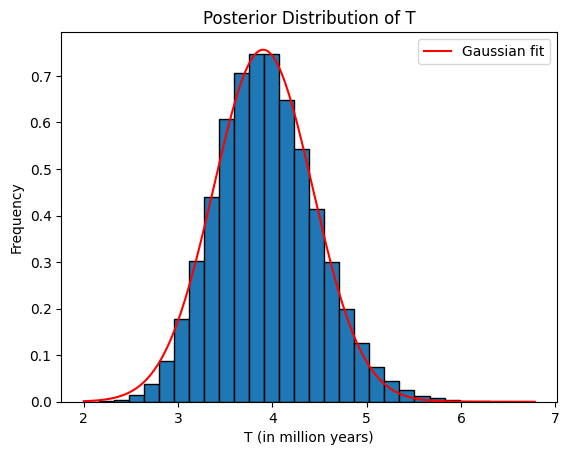

Fitted amplitude: 0.75624852845745
Fitted mean: 3.901769453402362
Fitted sigma: 0.5259809497509541


In [144]:
gaus_fit(TL)

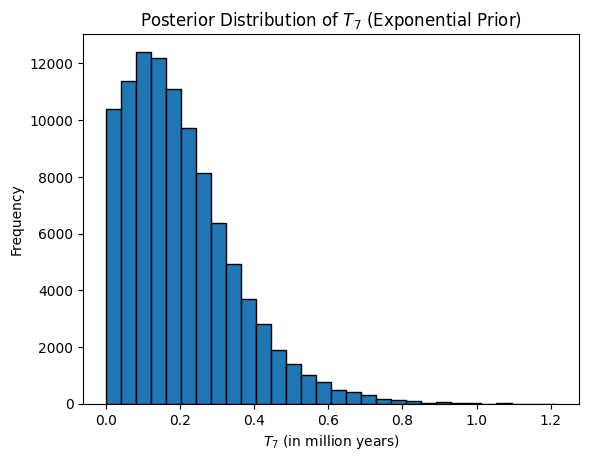

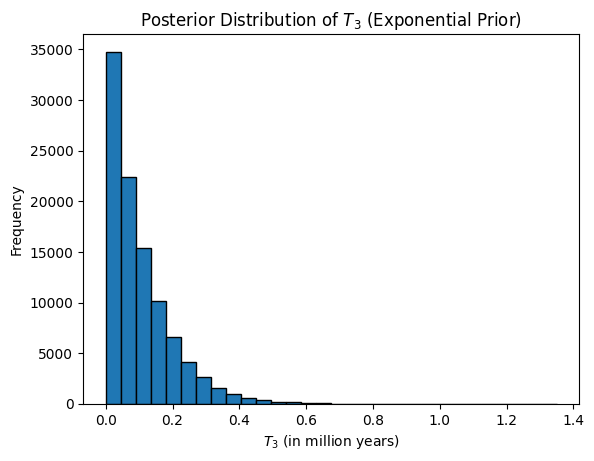

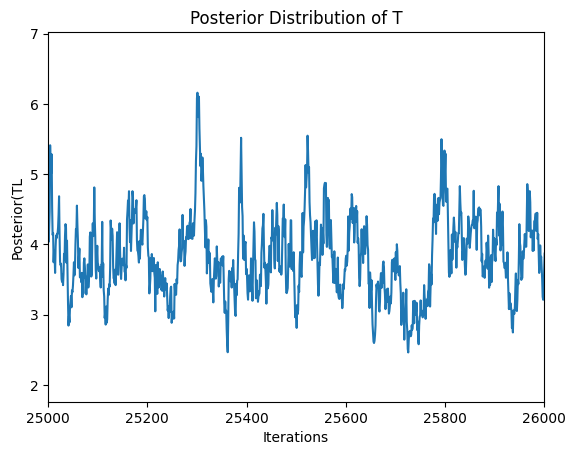

In [145]:
plt.hist(br_lens_7[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_7$ (Exponential Prior)")
plt.xlabel(r"$T_7$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.hist(br_lens_3[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_3$ (Exponential Prior)")
plt.xlabel(r"$T_3$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.plot(iterations, TL)
plt.xlim(25000, 26000)
plt.title("Posterior Distribution of T")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()


Total number of trees in the file: 100001

Tree 72492:


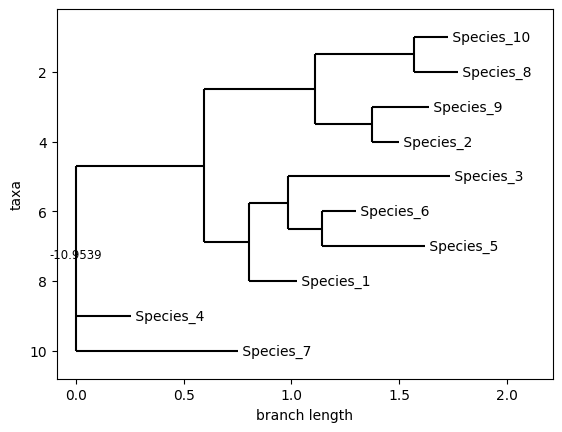

Tree(rooted=False, weight=1.0)
    Clade(comment='&index=18', confidence=-10.9539)
        Clade(branch_length=0.593542, comment='&index=14')
            Clade(branch_length=0.516596, comment='&index=17')
                Clade(branch_length=0.45958, comment='&index=12')
                    Clade(branch_length=0.158239, comment='&index=9', name='Species_10')
                    Clade(branch_length=0.201714, comment='&index=7', name='Species_8')
                Clade(branch_length=0.262356, comment='&index=15')
                    Clade(branch_length=0.268426, comment='&index=10', name='Species_9')
                    Clade(branch_length=0.129378, comment='&index=3', name='Species_2')
            Clade(branch_length=0.210565, comment='&index=11')
                Clade(branch_length=0.178768, comment='&index=16')
                    Clade(branch_length=0.751411, comment='&index=2', name='Species_3')
                    Clade(branch_length=0.158617, comment='&index=13')
                   

In [146]:
ind = np.argmax(posterior)
trees_file_path = "primates_cytb_JC3.trees"
read_and_visualize_trees(trees_file_path, ind,ind+1)

In [147]:
l4 = []
l4 = create_final_plot(l4)

Here I try to add another move for the branch length: mvLevyJump. The **mvLevyJump** move applies a Lévy jump process to the branch lengths. Lévy jumps are used to model sudden and large changes, making this move suitable for cases where you expect the branch lengths to change dramatically and abruptly.

In [148]:
filename = 'primates_cytb_JC4.log'
data = read_log_file(filename)
load_data(data)

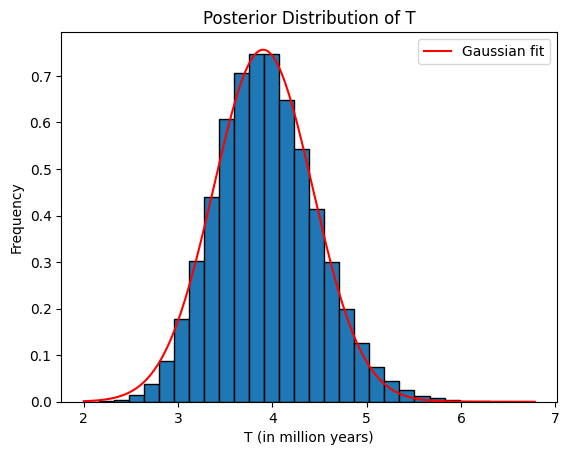

Fitted amplitude: 0.75624852845745
Fitted mean: 3.901769453402362
Fitted sigma: 0.5259809497509541


In [149]:
gaus_fit(TL)

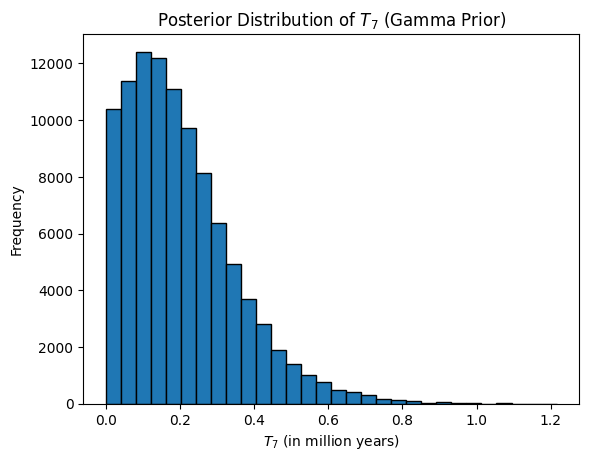

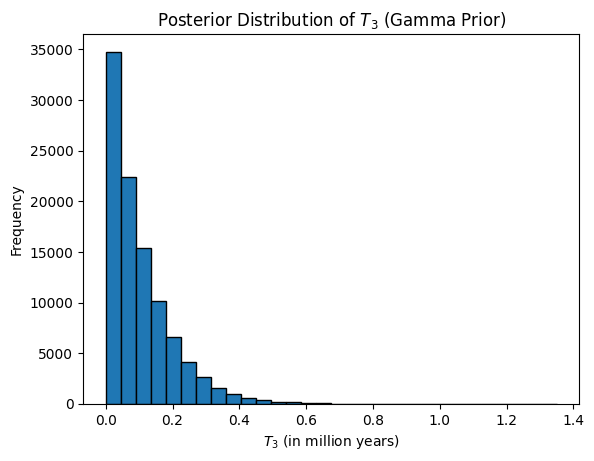

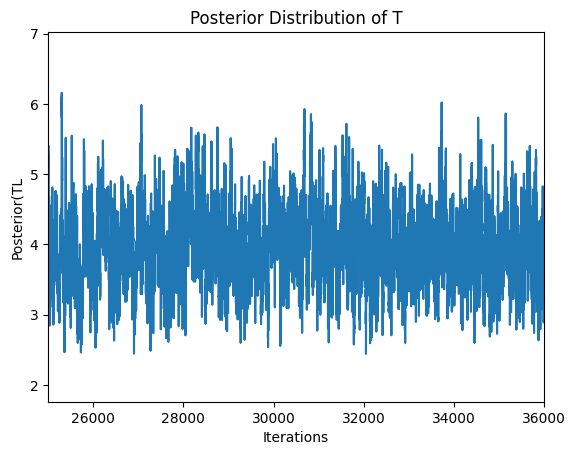

In [150]:
plt.hist(br_lens_7[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_7$ (Gamma Prior)")
plt.xlabel(r"$T_7$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.hist(br_lens_3[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_3$ (Gamma Prior)")
plt.xlabel(r"$T_3$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.plot(iterations, TL)
plt.xlim(25000, 36000)
plt.title("Posterior Distribution of T")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()


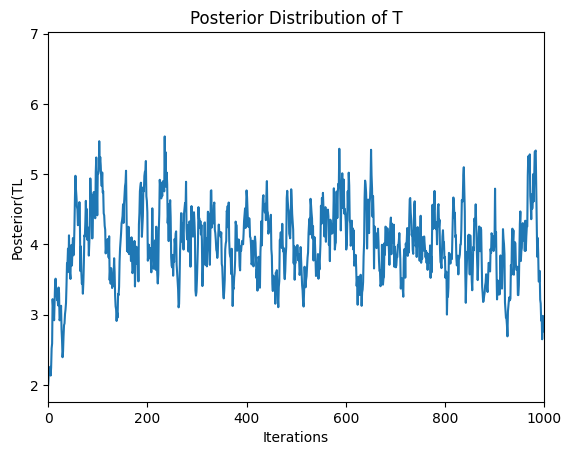

In [160]:
plt.plot(iterations, TL)
plt.xlim(0, 1000)
plt.title("Posterior Distribution of T")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()

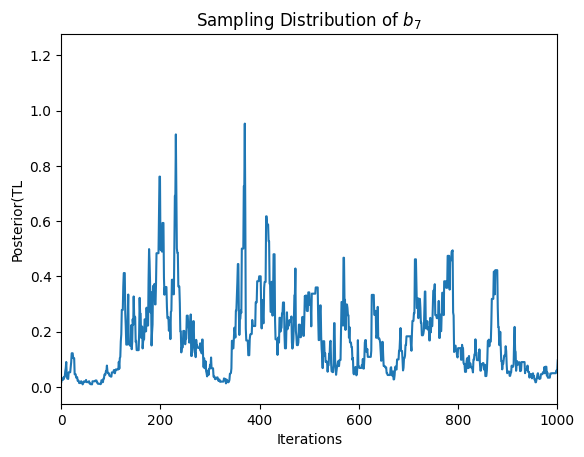

In [169]:
plt.plot(iterations, br_lens_7)
plt.xlim(0, 1000)
plt.title(r"Sampling Distribution of $b_7$")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()

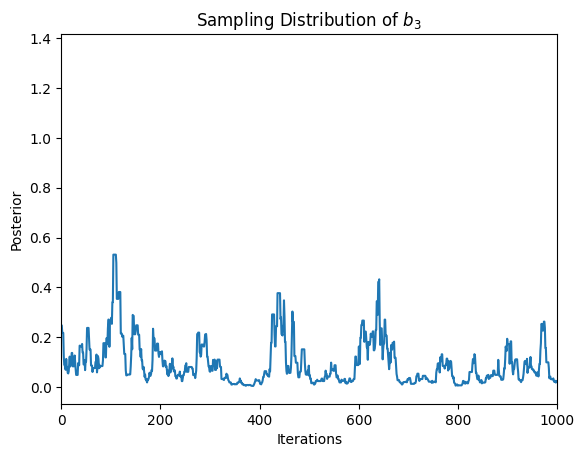

In [168]:
plt.plot(iterations, br_lens_3)
plt.xlim(0, 1000)
plt.title(r"Sampling Distribution of $b_3$")
plt.xlabel("Iterations")
plt.ylabel("Posterior")
plt.show()

In [151]:
l5 = []
l5 = create_final_plot(l5)

### We try also uniform prior on the branch lengths

In [171]:
filename = 'primates_cytb_JC5.log'
data = read_log_file(filename)
data['TL']=data['br_lens[1]']+data['br_lens[2]']+data['br_lens[3]']+data['br_lens[4]']+data['br_lens[5]']+data['br_lens[6]']+data['br_lens[7]']+data['br_lens[8]']+data['br_lens[9]']+data['br_lens[10]']+data['br_lens[11]']+data['br_lens[12]']+data['br_lens[13]']+data['br_lens[14]']+data['br_lens[15]']+data['br_lens[16]']+data['br_lens[17]']
load_data(data)

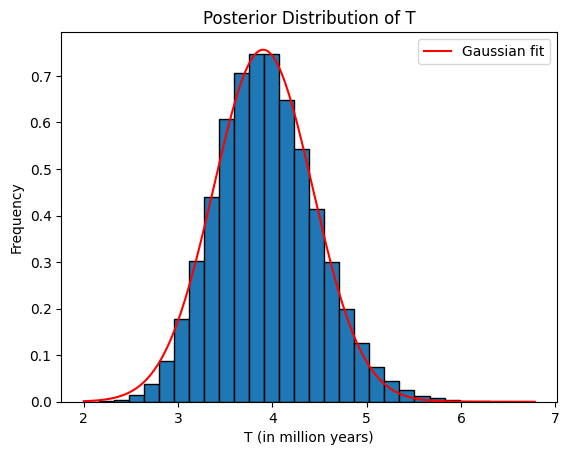

Fitted amplitude: 0.75624852845745
Fitted mean: 3.901769453402362
Fitted sigma: 0.5259809497509541


In [172]:
gaus_fit(TL)

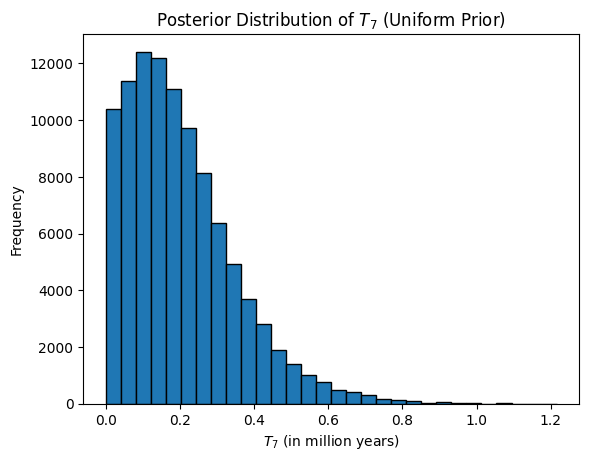

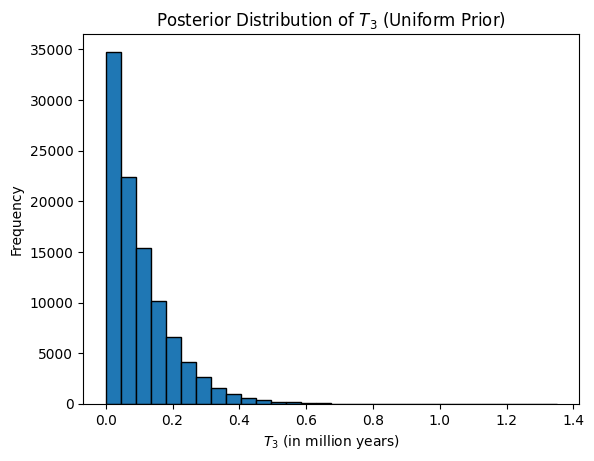

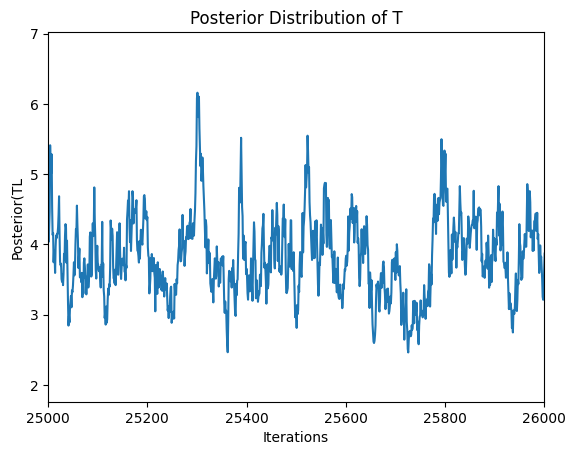

In [174]:
plt.hist(br_lens_7[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_7$ (Uniform Prior)")
plt.xlabel(r"$T_7$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.hist(br_lens_3[:], bins=30, edgecolor='black')
plt.title(r"Posterior Distribution of $T_3$ (Uniform Prior)")
plt.xlabel(r"$T_3$ (in million years)")
plt.ylabel("Frequency")
plt.show()

plt.plot(iterations, TL)
plt.xlim(25000, 26000)
plt.title("Posterior Distribution of T")
plt.xlabel("Iterations")
plt.ylabel("Posterior(TL")
plt.show()


Total number of trees in the file: 100001

Tree 72492:


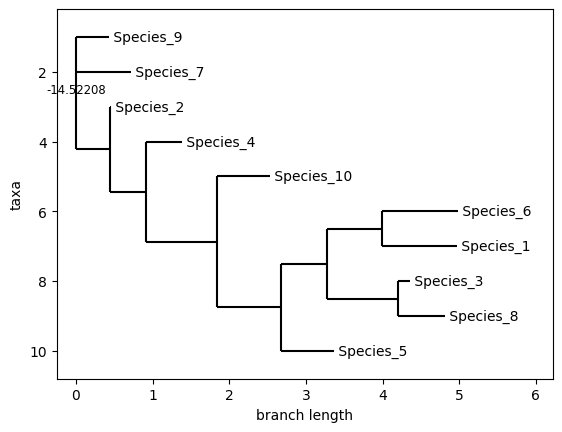

Tree(rooted=False, weight=1.0)
    Clade(comment='&index=18', confidence=-14.52208)
        Clade(branch_length=0.433924, comment='&index=10', name='Species_9')
        Clade(branch_length=0.71395, comment='&index=1', name='Species_7')
        Clade(branch_length=0.447918, comment='&index=17')
            Clade(branch_length=0.008445, comment='&index=3', name='Species_2')
            Clade(branch_length=0.459806, comment='&index=14')
                Clade(branch_length=0.472728, comment='&index=4', name='Species_4')
                Clade(branch_length=0.936928, comment='&index=11')
                    Clade(branch_length=0.681403, comment='&index=9', name='Species_10')
                    Clade(branch_length=0.833392, comment='&index=12')
                        Clade(branch_length=0.594281, comment='&index=13')
                            Clade(branch_length=0.713452, comment='&index=15')
                                Clade(branch_length=0.991463, comment='&index=6', name='Species_6

In [175]:
ind = np.argmax(posterior)
trees_file_path = "primates_cytb_JC5.trees"
read_and_visualize_trees(trees_file_path, ind,ind+1)

In [176]:
l6 = []
l6 = create_final_plot(l6)

Also in this case we find similar values for the branch lengths

# Results:

NNI

- Length 1: 0.3839217225613643
- Length 2: 0.20751388485737943
- Length 3: 0.10194423303525564
- Length 4: 0.28902231716868837
- Length 5: 0.16326316179892603
- Length 6: 0.222238132899251
- Length 7: 0.20328760259291406
- Length 8: 0.35303326837471627
- Length TL: 3.9394992585574147

SPR

mean: 
- Length 1: 0.38136143661193395
- Length 2: 0.20930704122175778
- Length 3: 0.09605684838200317
- Length 4: 0.2944043315345647
- Length 5: 0.16497717306638035
- Length 6: 0.22296835127582726
- Length 7: 0.2084198823499675
- Length 8: 0.35291404542994576
- Length TL: 3.9503942408375914


BOTH WITH A DIFFERENT PRIOR: 
- Length 1: 0.45100848977310226
- Length 2: 0.3234529391832081
- Length 3: 0.21450705300436998
- Length 4: 0.3930968356778432
- Length 5: 0.2997119232137678
- Length 6: 0.3380579253914461
- Length 7: 0.3170418869563305
- Length 8: 0.4337723270735293
- Length TL: 5.755217201827982





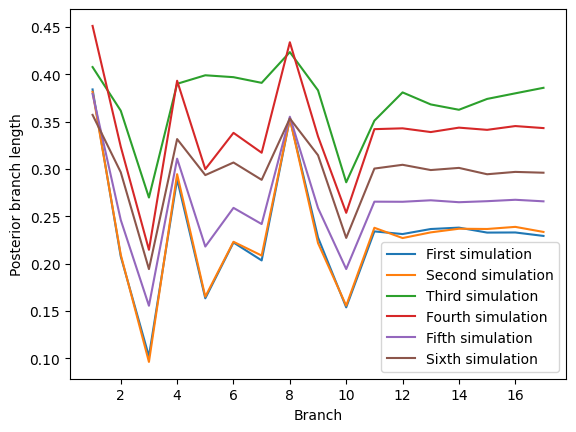

In [178]:
plt.plot(np.arange(1,18), l1, label='First simulation')
plt.plot(np.arange(1,18), l2, label='Second simulation')
plt.plot(np.arange(1,18), np.array(l3)/5.5, label='Third simulation')
plt.plot(np.arange(1,18), l4, label='Fourth simulation')
plt.plot(np.arange(1,18), l5, label='Fifth simulation')
plt.plot(np.arange(1,18), np.array(l6)/1.9, label='Sixth simulation')
plt.xlabel("Branch")
plt.ylabel("Posterior branch length")
plt.legend()
plt.show()

The relative length of the branches are similar but the absolute value is determined by the prior. Differences in prior gives big differences in posterior

### Summary:

We have seen that estimating a phylogenetic tree involves evaluating many possible solutions and possible evolutionary histories that could explain a set of observed data, typically by using a model of evolution. Markov Chain Monte Carlo (MCMC) is a leading method for approximating the posterior distribution of parameters in a mathematical model.

We have seen that for a decent number of taxa the tree topologies to exploit are too many. We dealt with discrete parameters (tree topologies) and continous parameters (the length, the number of substitution in unit time). 
